<center>
    
## <font color='maroon'>ASTR 20500</font>
## <font color='maroon'>Introduction to Python programming<br> with elements of astro statistics</font>
</center>

### Instructor: 
Andrey Kravtsov (email: <tt>kravtsov@uchicago.edu</tt>)
Professor,<br> Department of Astronomy & Astrophysics


### Course Assistants:  
William Cerny (<tt>willcerny@gmail.com</tt>), 
Medha Goyal (<tt>medhagoyal@uchicago.edu</tt>),
<br> Jason Lin (<tt>linj24@uchicago.edu</tt>), Jared Siegel (<tt>siegeljc@uchicago.edu</tt>)

### Slack workspace: [<tt>a205f20.slack.com</tt>](a205f20.slack.com)

In [ ]:
import numpy as np
from matplotlib import pylab as plt
import pandas

# the following commands make plots look better
plt.rc('font', size=15)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [2., 2.])


<center>
    
## <font color='darkblue'>Election "postmortem"</font>

<br>
    
<center>
<img src="https://www.azquotes.com/picture-quotes/quote-it-s-tough-to-make-predictions-especially-about-the-future-yogi-berra-41-5-0514.jpg"></img>


<center>
<img src="https://www.azquotes.com/picture-quotes/quote-it-is-very-difficult-to-make-an-accurate-prediction-especially-about-the-future-niels-bohr-75-12-73.jpg"></img>


<center>
<img src="https://image.slidesharecdn.com/megatrendsinretailbankingpublish-120616090839-phpapp02/95/mega-trends-in-retail-banking-13-638.jpg"></img>



<center>
<img src="https://www.brainyquote.com/photos_tr/en/c/caseystengel/379442/caseystengel1-2x.jpg"></img>

<br>
    
<center>
<img src="https://imgs.xkcd.com/comics/election_map_2x.png"></img>



<center>
    
### <font color='darkblue'>"*But happily, hypotheses, even if full of error, fail us not.*" — F.W. Argelander</font>

<br>
    
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Friedrich_Wilhelm_August_Argelander_1852.jpg"></img>


<center>
    
### <font color='darkblue'>A model, even if very wrong, can provide an extremely useful *framework* for interpreting results </font>
</center>

<br>
Interpreting results within a good framework often leads to sharp insights about what's occuring, giving an opportunity to 
  

   1) improve our understanding of reality

   2) improving our ability to forecast future experimental results. 

<center>
    
#### <font color='darkblue'>Which parts of our election forecast model led to the forecast that underestimated D. Trump's win chances?</font>

<br>
    

In [ ]:
def gauss2d_corr_rnd(n, m1 = 0., m2 = 0., s1 = 1., s2 = 1., r = 0.9, cov = None): 
    '''
    generate 2 sequences of Gaussian random numbers of length n with means m1 and m2 and st deviations s1 and s2
    that are correlated with the input correlation coefficient r or with input covariance matrix cov
    
    function uses Cholesky matrix decomposition to impose correlations on uncorrelated numbers
    
    This function is meant to be used as a black both by you, so don't worry if you don't understand everything here
    '''
    if cov == None: # if covariance matrix is not specified, construct it
        cov = [[s1**2, r*s1*s2], [r*s1*s2, s2**2]]
    # compute lower triangle via Cholesky decomposition
    lcov = np.linalg.cholesky(cov)
    # generate 2*n correlated gaussian numbers
    xcorr = np.dot(lcov, np.random.normal(size=(2,n)))
    # shift random numbers by their corresponding means and return
    return m1 + xcorr[0,:], m2 + xcorr[1,:]

In [ ]:
def plot_xy(x, y, figsize=(5,5), xlim = [-5, 5], ylim = [-5, 5]):
    plt.figure(figsize = figsize) # define figure and its dimensions
    plt.xlabel('x'); plt.ylabel('y') # x and y axes labels
    plt.xlim(xlim); plt.ylim(ylim)
    plt.scatter(x, y, marker = '.', s = 2, c = 'darkslateblue')
    plt.grid(ls = 'dotted')
    plt.show()

In [ ]:
def rcorrnp(x, y, to_print=False):
    """Compute correlation coefficient for equal size vectors x and y"""
    nx = len(x)
    assert(nx == len(y)) # this will catch seqiences with unequal size and generate error
    
    xm, xstd = np.mean(x), np.std(x, ddof = 1)
    ym, ystd = np.mean(y), np.std(y, ddof = 1)
    r = np.sum((x - xm) * (y - ym)) / xstd / ystd / (nx - 1)
    if to_print:
        print("correlation coefficient = {:.5g}".format(r))
    return r

corr. coefficient  = 0.69891


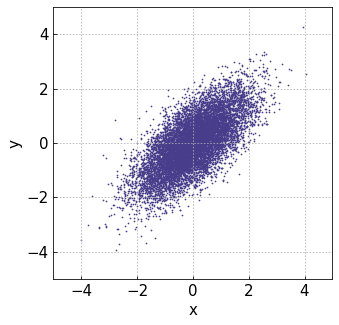

In [ ]:
x, y = gauss2d_corr_rnd(10000, s1 = 1., s2 = 1., r = 0.7)

print("corr. coefficient  = {:.5g}".format(rcorrnp(x, y)))

plot_xy(x, y)

### <font color='darkblue'>The correlation coefficient</font>

Named after 19th century British mathematician [Carl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) who popularized it around 1900, although similar ideas [were introduced by Francis Galton amd Auguste Bravais](https://projecteuclid.org/euclid.ss/1177012580) (the latter also derived the equation for the coefficient).  Yet another example of mis-attribution of name for a scientific result (aka [the Stigler's law](https://en.wikipedia.org/wiki/Stigler%27s_law_of_eponymy)).

Given two sequences of numbers, $\vec{x}$ and $\vec{y}$, of length $n$, their sample means, $\bar{x}$ and $\bar{y}$, and variances, $s^2_x$ and $s^2_y$. The sample correlation coefficient is computed as

$$r = \frac{s^2_{xy}}{s_x s_y} = \frac{1}{n-1}\,\sum\limits_{i=0}^{n-1}\,\left(\frac{x_i-\bar{x}}{s_x}\right)\,\left(\frac{y_i-\bar{y}}{s_y}\right) $$


where, as before: 

$$\bar{x} = {1\over n}\,\sum\limits_{i=0}^{n-1}\, x_i; \ \ \ \ \ 
\bar{y} = {1\over n}\,\sum\limits_{i=0}^{n-1}\, y_i$$

$$ s^2_x = {1\over n-1} \sum_{i=0}^{n-1} (x_i - \bar{x})^2;  \ \ \ \ \ 
   s^2_y = {1\over n-1} \sum_{i=0}^{n-1} (y_i - \bar{y})^2 $$

And their standard deviations are computed are  $s_x = \sqrt{s^2_x}$ and $s_y = \sqrt{s^2_y}$.

### <font color='darkblue'>Covariance and correlation coefficient</font>

This second term in the expression for the error of the mean is closely related to the notions of covariance and Pearson correlation coefficient. 


***Sample covariance:*** suppose we have two sequences of numbers, $\vec{x}$ and $\vec{y}$, of length $n$, their sample means, $\bar{x}$ and $\bar{y}$, then sample covariance of $x$ and $y$ is defined as: 

$$s^2_{xy} = \frac{1}{n-1}\,\sum\limits_{i=0}^{n-1}\,\left(x_i-\bar{x}\right)\,\left(y_i-\bar{y}\right).$$

In [ ]:
states_electoral = pandas.read_csv('http://astro.uchicago.edu/~andrey/classes/a205f20/data/states_electoral.csv')
states      = np.array(states_electoral['Name'])
electors    = np.array(states_electoral['Electors'])
nstates     = states.size

In [ ]:
url = 'http://astro.uchicago.edu/~andrey/classes/a205f20/data/presidential_polls_results.csv'
pad = pandas.read_csv(url)

In [ ]:
st = list(pad['State'])
state_names = list(pad['Name'])

dem_polls, rep_polls = np.empty((51,3)), np.empty((51,3))
dem_results, rep_results = np.empty((51,3)), np.empty((51,3))

years = [2008, 2012, 2016]
for i, yr in enumerate(years): 
    dem_polls[:,i] =  np.array(pad['Dem_polls_'+str(yr)])
    rep_polls[:,i] =  np.array(pad['Rep_polls_'+str(yr)])
    dem_results[:,i] =  np.array(pad['Dem_results_'+str(yr)])
    rep_results[:,i] =  np.array(pad['Rep_results_'+str(yr)])


### <font color='darkblue'>Regression</font>

First developed by [Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton) and applied (Charles Darwin's half-cousin) to the data on the heights of parents and their children (Galton 1877, 1886). 

Galton discovered that parents whose average heights (mid-heights) are above the mean tend to have children with heights closer to the median than they, which was called ***regression*** to the mean. 

<br>
<center>
<img src="http://astro.uchicago.edu/~andrey/classes/a205f20/img/regression_heights.png"></img>

Stated like this, I find it always quite confusing (as do many other people). What this means simply is that the ***slope*** of the correlation between the heights of children and the mid-heights of their parents is smaller than 1 (which corresponds to "one-to-one" correlation, where heights of children would mostly reflect the height of their parents). 

This regression is true in both directions. 

### <font color='darkblue'>Regression: how to estimate the slope of a correlation?</font>

Suppose we have two vectors of the same length $n$, $x$ and $y$, with their means $\bar{x}$ and $\bar{y}$. 

Let's define new variables $\bar{x}$, $ \bar{y}$ "centered" on the means: 

$$\tilde{x} = x - \bar{x};\ \ \ \ \tilde{y} = y - \bar{y}$$

The ***regression process*** is estimating the slope $b_{yx}$ that approximates relation between $\tilde{x}$ and $\tilde{y}$ using a proportionality ("linear") relation: 

$$\tilde{y}_m = b_{yx}\tilde{x},$$

$$\rightarrow\ \ \ y_m = b_{yx} x + \bar{y} - b_{yx}\bar{x} = b_{yx} x + c$$

$$c = \bar{y} - b_{yx}\bar{x}$$

### <font color='darkblue'>The least square method: estimating the slope by minimizing the sum of squares of the model residuals residual</font>

Difference between $y$ data values and model prediction $\tilde{y}_m$:
$$e_i = \tilde{y}_i - \tilde{y}_m.$$

Let's find the value of $b_{xy}$ that minimizes the sum of squares of $e_i$: 

$$E_2 = \frac{1}{n}\,\sum\limits_{i=0}^{n-1}e^2_i = \frac{1}{n}\,\sum\limits_{i=0}^{n-1}(\tilde{y}_i - b_{yx} \tilde{x}_i)^2 = \frac{1}{n}\,\sum\limits_{i=0}^{n-1}(\tilde{y}_i^2 - 2b_{yx} \tilde{x}_i \tilde{y}_i + b^2_{yx}\tilde{x}^2_i)$$

The value of $b_{xy}$ that minimizes $E_2$ corresponds to $\partial E_2/\partial b_{yx} = 0$: 


$$\frac{\partial E_2}{\partial b_{yx}} = \frac{1}{n}\,\sum\limits_{i=0}^{n-1}(2\tilde{x}\tilde{y} - 2 b_{yx}\tilde{x}^2)=\frac{2}{n} \,\sum\limits_{i=0}^{n-1}\tilde{x}\tilde{y} - 2\frac{b_{yx}}{n}\,\sum\limits_{i=0}^{n-1} \tilde{x}^2 = 2\frac{(n-1)}{n}\,\left[s^2_{xy} - b_{yx}s^2_x\right]=0,$$

which implies: 

$$b_{yx} = \frac{s^2_{xy}}{s^2_x}=\frac{1}{s^2_x(n-1)}\,\sum\limits_{i=0}^{n-1}\,\left(x_i-\bar{x}\right)\,\left(y_i-\bar{y}\right) = r_{xy}\,\frac{s_y}{s_x},$$

where $r_{xy}$ is the correlation coefficient. 


We can apply the same procedure to determine the model predicting $x$ as a function of $y$:

$$ \tilde{x}_m = b_{xy} \tilde{y}$$

where

$$b_{xy} = \frac{s_{xy}}{s^2_y}=r_{xy}\,\frac{s_x}{s_y}.$$

In [ ]:
def compute_slope_const(x, y):
    nx = len(x)
    assert(nx == len(y)) # this will catch seqiences with unequal size and generate error
    xm = np.mean(x)
    ym = np.mean(y)
    byx = np.sum((x-xm)*(y-ym)) / (nx-1) / np.var(x, ddof=1)
    c = ym - byx * xm
    return byx, c

In [ ]:
x = (rep_polls).flatten()
y = (rep_results - rep_polls).flatten()

y = y[(x > 30) & (x < 70)]
x = x[(x > 30) & (x < 70)]

b, c = compute_slope_const(x, y)

In [ ]:
print(b, c)

0.15029247679195407 -2.9393176572076074


In [ ]:
sel_states = ['Arizona', 'Florida', 'Georgia', 'Iowa', 'Ohio', 'Michigan', 'North Carolina', 'Pennsylvania', 'Texas', 'Wisconsin']
b_ave_sel = np.array([48.69, 49.09, 48.19, 46.81, 46.62, 50.91, 49.00, 50.27, 47.12, 51.54])
t_ave_sel = np.array([45.97, 46.65, 47.21, 47.10, 47.75, 43.25, 47.13, 45.03, 48.13, 43.70])

In [ ]:
# 11/03/2020
b_res_sel0 = np.array([52.4, 47.8, 48.1, 45.4, 45.2, 45.2, 48.7, 42.5, 46.3, 47.2])
t_res_sel0 = np.array([46.3, 51.2, 50.6, 52.6, 53.3, 53., 50.1, 56.2, 52.3, 51.1])
# 11/04/2020
b_res_sel = np.array([51.0, 47.8, 48.7, 45.4, 45.2, 49.8, 48.7, 46.8, 46.2, 49.4])
t_res_sel = np.array([47.6, 51.2, 50.1, 52.7, 53.3, 48.6, 50.1, 51.9, 52.3, 48.8])

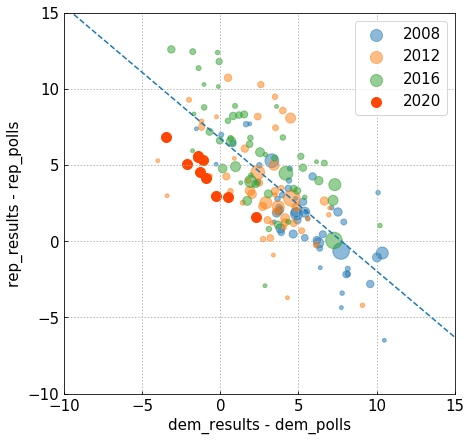

In [ ]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111) 

plt.xlim(-10,15); plt.ylim(-10,15)
plt.ylabel('rep_results - rep_polls')
plt.xlabel('dem_results - dem_polls')
plt.scatter(dem_results[:,0]-dem_polls[:,0], rep_results[:,0]-rep_polls[:,0], alpha=0.5, s=5*electors, 
            label='2008')
plt.scatter(dem_results[:,1]-dem_polls[:,1], rep_results[:,1]-rep_polls[:,1], alpha=0.5, s=5*electors, 
            label='2012')
plt.scatter(dem_results[:,2]-dem_polls[:,2], rep_results[:,2]-rep_polls[:,2], alpha=0.5, s=5*electors, 
            label='2016')
plt.scatter(b_res_sel-b_ave_sel, (t_res_sel-t_ave_sel), c='orangered', s=100, 
            label='2020')

xf = np.linspace(-100,100,10)
plt.plot(xf, b * xf + c, '--')
plt.grid(ls=':')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print(sel_states)
print(b_res_sel-b_ave_sel)
print(t_res_sel-t_ave_sel)

['Arizona', 'Florida', 'Georgia', 'Iowa', 'Ohio', 'Michigan', 'North Carolina', 'Pennsylvania', 'Texas', 'Wisconsin']
[ 2.31 -1.29  0.11 -1.41 -1.42 -1.61 -0.3  -5.97 -0.92 -2.04]
[1.63 4.55 3.29 5.6  5.55 5.85 2.97 9.27 4.17 5.1 ]


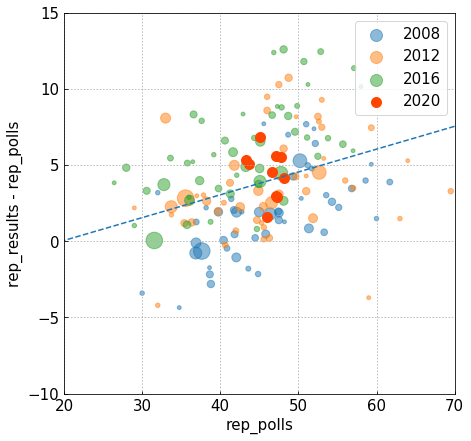

In [ ]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111) 

plt.xlim(20,70); plt.ylim(-10,15)
plt.ylabel('rep_results - rep_polls')
plt.xlabel('rep_polls')
plt.scatter(rep_polls[:,0], rep_results[:,0]-rep_polls[:,0], alpha=0.5, s=5*electors, 
            label='2008')
plt.scatter(rep_polls[:,1], rep_results[:,1]-rep_polls[:,1], alpha=0.5, s=5*electors, 
            label='2012')
plt.scatter(rep_polls[:,2], rep_results[:,2]-rep_polls[:,2], alpha=0.5, s=5*electors, 
            label='2016')
plt.scatter(t_ave_sel, (t_res_sel-t_ave_sel), c='orangered', s=100, 
            label='2020')

xf = np.linspace(-100,100,10)
plt.plot(xf, 0.15 * xf - 2.94, '--')
plt.grid(ls=':')
plt.legend(loc='upper right')
plt.show()

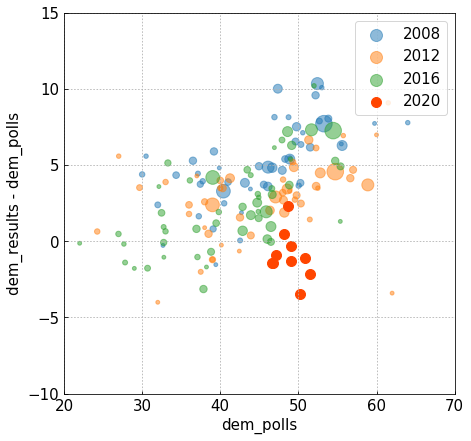

In [ ]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111) 

plt.xlim(20,70); plt.ylim(-10,15)
plt.ylabel('dem_results - dem_polls')
plt.xlabel('dem_polls')
plt.scatter(dem_polls[:,0], dem_results[:,0]-dem_polls[:,0], alpha=0.5, s=5*electors, 
            label='2008')
plt.scatter(dem_polls[:,1], dem_results[:,1]-dem_polls[:,1], alpha=0.5, s=5*electors, 
            label='2012')
plt.scatter(dem_polls[:,2], dem_results[:,2]-dem_polls[:,2], alpha=0.5, s=5*electors, 
            label='2016')
plt.scatter(b_ave_sel, (b_res_sel-b_ave_sel), c='orangered', s=100, 
            label='2020')

xf = np.linspace(-100,100,10)
#plt.plot(xf, b * xf + c, '--')
plt.grid(ls=':')
plt.legend(loc='upper right')
plt.show()

### <font color='darkblue'>Breakout session</font>

* Discuss possible approach to estimate uncertainties of the slope $b$ and constant $c$ estimated using the least squares method. 


* The code line below computes the standard deviation (in percentage points) of the difference between results of election and poll results for the republican candidates *around to the mean linear model.* How does this standard deviation compare to the errors you used in your election forecast model?


* Do you see any ways in which the result of the regression model can be used in an election forecast model?  


In [ ]:
print(np.std(y - b*x - c, ddof=1))

2.5731900472278677


### <font color='darkblue'>The weighted least square method</font>

Data for which we are doing regression often has uncertainties that are specific to each data value (heteroskedastic uncertainties in the statistics jargon). In such a case uncertainties can be taken into account in the least squares method via weights inversely proportional to the square of value's uncertainty (i.e. inversely proportional to its variance). The values with smaller weights (larger uncertainty) will affect result of the regression less than values with smaller uncertainties. 

Let's define the "tilde" variables with respect to the *weighted* mean of the data:

$$\bar{x}_w = \frac{\sum\limits_{i=0}^{n-1}w_i x_i}{\sum\limits_{i=0}^{n-1}w_i}; \ \ \ \bar{y}_w = \frac{\sum\limits_{i=0}^{n-1}w_i y_i}{\sum\limits_{i=0}^{n-1}w_i}.$$

$$\tilde{x}_i = x_i - \bar{x}_w;\ \ \ \ \tilde{y}_i = y_i - \bar{y}_w.$$ 

The difference between $y$ data values and model prediction $\tilde{y}_m$:
$$e_i = \tilde{y}_i - \tilde{y}_m.$$

Let's find the value of $b_{xy}$ that minimizes the sum of squares of $e_i$, but now with weights $w_i$: 

$$E_2 = \frac{1}{n}\,\sum\limits_{i=0}^{n-1}e^2_i = \frac{1}{n}\,\sum\limits_{i=0}^{n-1}w_i(\tilde{y}_i - b_{yx} \tilde{x}_i)^2 = \frac{1}{n}\,\sum\limits_{i=0}^{n-1}w_i(\tilde{y}_i^2 - 2b_{yx} \tilde{x}_i \tilde{y}_i + b^2_{yx}\tilde{x}^2_i)$$

The value of $b_{xy}$ that minimizes $E_2$ corresponds to $\partial E_2/\partial b_{yx} = 0$: 


$$\frac{\partial E_2}{\partial b_{yx}} = \frac{1}{n}\,\sum\limits_{i=0}^{n-1}w_i(2\tilde{x}\tilde{y} - 2 b_{yx}\tilde{x}^2)=\frac{2}{n} \,\sum\limits_{i=0}^{n-1}w_i\tilde{x}_i\tilde{y}_i - 2\frac{b_{yx}}{n}\,\sum\limits_{i=0}^{n-1} w_i\tilde{x}_i^2 = 0,$$

which implies: 

$$b_{yx, w} = \frac{\sum\limits_{i=0}^{n-1}\,w_i\left(x_i-\bar{x}\right)\,\left(y_i-\bar{y}\right)}{\sum\limits_{i=0}^{n-1}\,w_i\left(x_i-\bar{x}\right)^2}.$$

The intercept $c_w$ is 
$$c_w = \bar{y}_w - b_{xy,w}\bar{x}_w.$$

### <font color='darkblue'>Summary of this week</font>

* The bootstrap method provides a useful general tool to draw samples from a distribution for which we only have an empirical sample and to estimate uncertainties of statistical quantities from such samples. 

* The least squares regression is a common and most simplest way to quantify a correlation between measurements.

* Developing ***accurate*** phenomonelogical models is difficult, but doing so is extremely useful *if the models are predictive.* 


### <font color='darkblue'>Another interesting correlation</font>


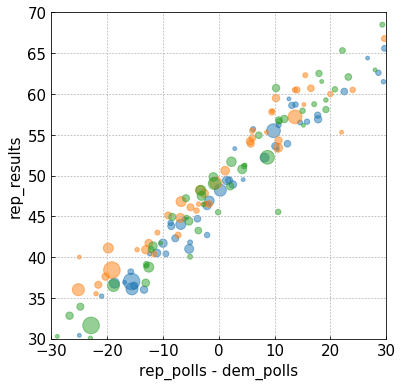

In [ ]:
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111) 

plt.xlim(-30,30); plt.ylim(30,70)
plt.ylabel('rep_results')
plt.xlabel('rep_polls - dem_polls')
plt.scatter(rep_polls[:,0]-dem_polls[:,0], rep_results[:,0], alpha=0.5, s=5*electors)
plt.scatter(rep_polls[:,1]-dem_polls[:,1], rep_results[:,1], alpha=0.5, s=5*electors)
plt.scatter(rep_polls[:,2]-dem_polls[:,2], rep_results[:,2], alpha=0.5, s=5*electors)
x = np.linspace(-100,100,10)
#plt.plot(x, 0.01*(popt[0]*x + popt[1]), '--')
plt.grid(ls=':')
plt.show()